In [150]:
 # pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

## Setting MPS

In [151]:
import torch
print(torch.backends.mps.is_available())  # Should return True
print(torch.backends.mps.is_built())      # Should return True

True
True


In [152]:
device = torch.device("mps")

In [153]:
device

device(type='mps')

# About Data:

## OCTMNIST Diagnosis Categories of Retinal Data:  

## Choroidal Neovascularization (CNV) – Label 0

- Growth of new blood vessels from the choroid through a break in the Bruch membrane.
- Major cause of visual loss.
- Leads to damage in the sub-retinal pigment epithelium (sub-RPE) or subretinal space.

## Diabetic Macular Edema (DME) – Label 1

- Complication of diabetes causing fluid accumulation in the macula.
- Affects the fovea, where vision is sharpest.
- Leads to progressive vision loss over time, making it hard to focus.


## Drusen – Label 2

- Yellow deposits of lipids and proteins under the retina.
- Small drusen are generally harmless.
- Large drusen are an early sign of dry age-related macular degeneration.

## Normal Retina – Label 3

- Healthy retina without signs of CNV, DME, or drusen.

## Installing Data

In [154]:
pip install medmnist

Note: you may need to restart the kernel to use updated packages.


In [155]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from medmnist import OCTMNIST
import numpy as np
from collections import Counter
from torchvision.transforms import ToTensor
import pandas as pd

In [156]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load train, validation, and test datasets
train_dataset = OCTMNIST(split='train', download=True, size =64, transform=transform)
val_dataset = OCTMNIST(split='val', download=True, size =64,transform=transform)
test_dataset = OCTMNIST(split='test', download=True, size =64,transform=transform)


In [157]:
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 97477
Validation set size: 10832
Test set size: 1000


In [158]:
# Calculate total images
total_images = len(train_dataset) + len(val_dataset) + len(test_dataset)
print(f"Total images in OCTMNIST: {total_images}")

Total images in OCTMNIST: 109309


# Visualize data in each folder

In [159]:
# Create DataLoaders for batch processing
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

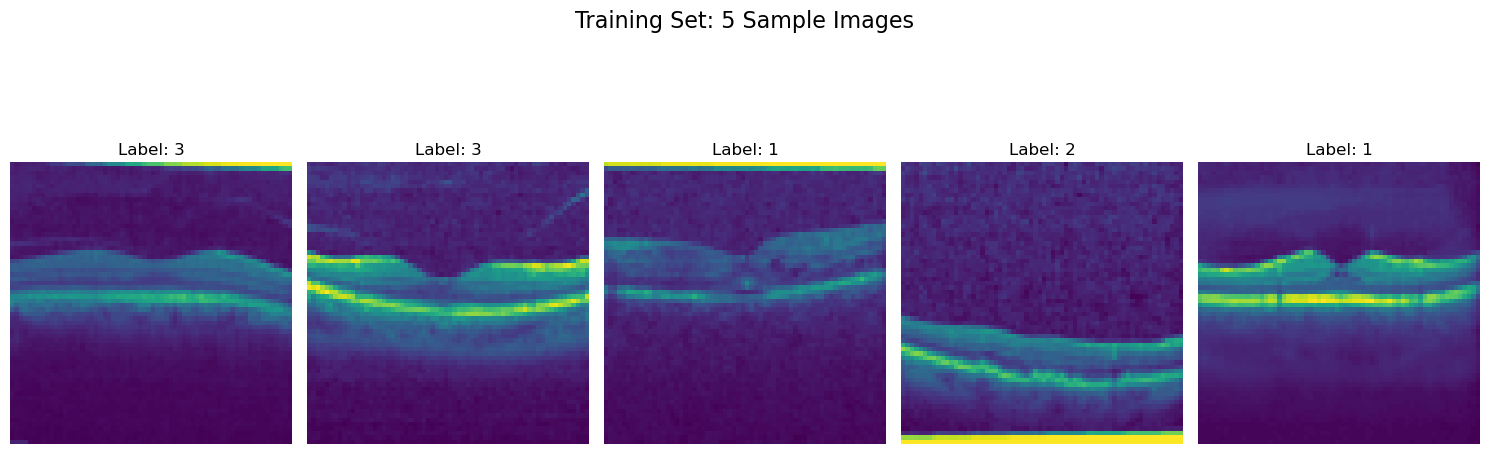

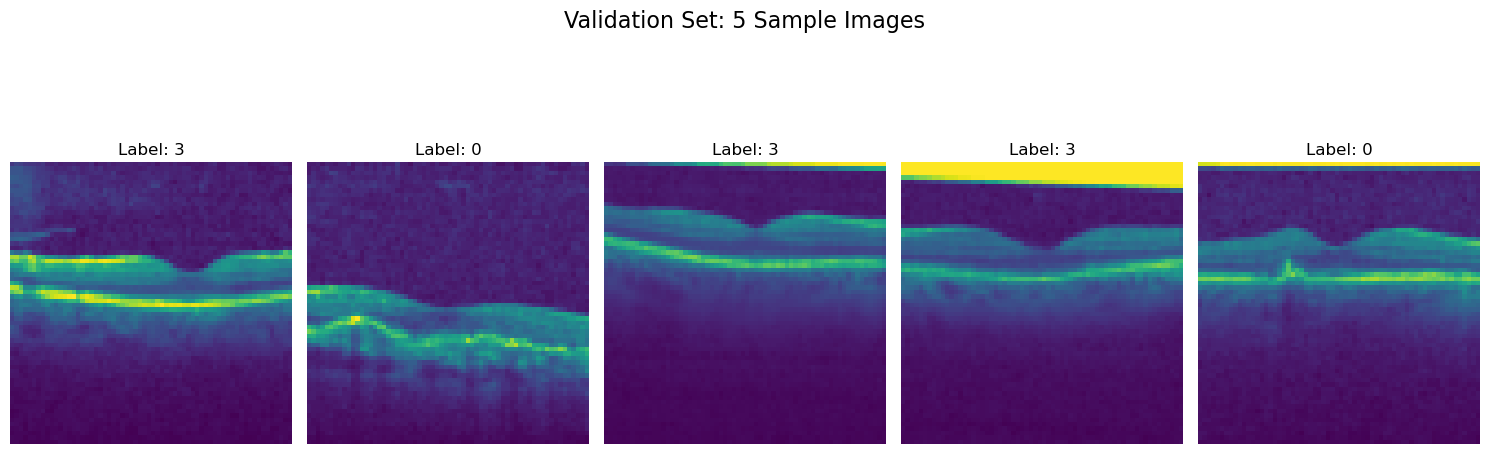

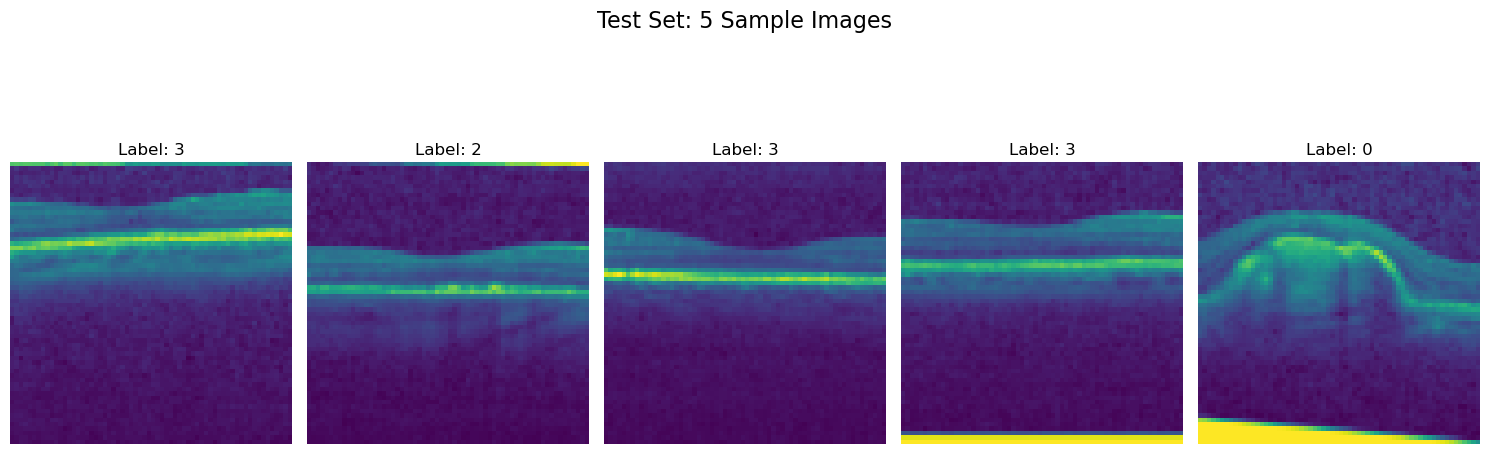

In [160]:
def show_sample_images(loader, title):
    # Load one batch of images and labels
    images, labels = next(iter(loader))

    # Display the first 5 images
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle(title, fontsize=16, y=1.05)  # Set title for the figure
    for i in range(5):
        axes[i].imshow(images[i][0])  # OCT images are grayscale
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Show sample images
show_sample_images(train_loader, "Training Set: 5 Sample Images")
show_sample_images(val_loader, "Validation Set: 5 Sample Images")
show_sample_images(test_loader, "Test Set: 5 Sample Images")


The visualization displays randomly selected grayscale retinal OCT images from each dataset (validation and test), showcasing how images differ between classes. Noticeable structural differences can be seen, particularly in the fluid buildup and irregular layers (Labels 0, 1, 2) compared to normal, smoother retinal layers (Label 3), which can help in distinguishing pathological conditions.

## Distribution of labels in each set of data:

,Label,Train Count,Train %,Validation Count,Validation %,Test Count,Test %
0,CNV (0),33484,34.350667,3721,34.351920,250,25.0
1,DME (1),10213,10.477343,1135,10.478213,250,25.0
2,Drusen (2),7754,7.954697,862,7.957903,250,25.0
3,Normal (3),46026,47.217292,5114,47.211965,250,25.0


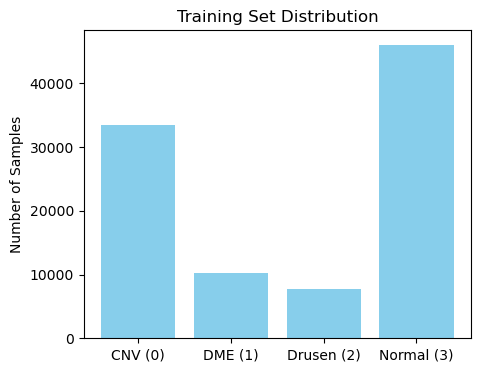

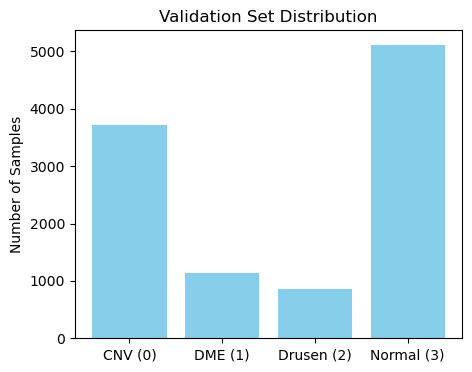

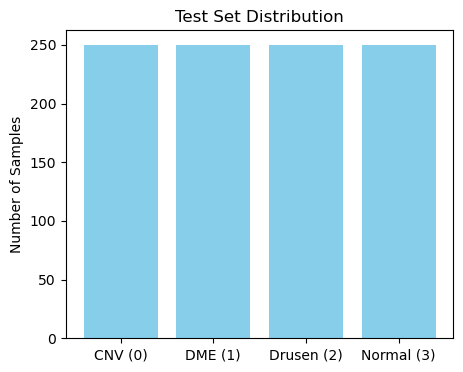

In [161]:
def get_label_distribution(dataset):
    labels = [sample[1].item() for sample in dataset]  # Extract all labels
    label_counts = Counter(labels)  # Count occurrences of each label
    total_labels = sum(label_counts.values())

    # Normalize to get percentage distribution
    label_distribution = {label: (count / total_labels) * 100 for label, count in label_counts.items()}
    return label_counts, label_distribution

# Get distribution for training, validation, and test sets
train_counts, train_distribution = get_label_distribution(train_dataset)
val_counts, val_distribution = get_label_distribution(val_dataset)
test_counts, test_distribution = get_label_distribution(test_dataset)

# Prepare data to display
distribution_data = {
    'Label': ['CNV (0)', 'DME (1)', 'Drusen (2)', 'Normal (3)'],
    'Train Count': [train_counts.get(i, 0) for i in range(4)],
    'Train %': [train_distribution.get(i, 0) for i in range(4)],
    'Validation Count': [val_counts.get(i, 0) for i in range(4)],
    'Validation %': [val_distribution.get(i, 0) for i in range(4)],
    'Test Count': [test_counts.get(i, 0) for i in range(4)],
    'Test %': [test_distribution.get(i, 0) for i in range(4)],
}

df_distribution = pd.DataFrame(distribution_data)
display(df_distribution)

# Plotting the distribution for better visualization
def plot_distribution(counts, title):
    labels = ['CNV (0)', 'DME (1)', 'Drusen (2)', 'Normal (3)']
    values = [counts.get(i, 0) for i in range(4)]
    plt.figure(figsize=(5, 4))
    plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.ylabel("Number of Samples")
    plt.show()

# Plot distributions
plot_distribution(train_counts, "Training Set Distribution")
plot_distribution(val_counts, "Validation Set Distribution")
plot_distribution(test_counts, "Test Set Distribution")


Insights from the OCTMNIST Label Distribution:
Training Set:

The dataset is highly imbalanced, with the Normal Retina (Label 3) having the highest number of samples.
CNV (Label 0) also has a large number of samples but is less than the normal retina class.
DME (Label 1) and Drusen (Label 2) have significantly fewer samples compared to CNV and Normal Retina, indicating an imbalance that may affect model performance.
Validation Set:

Similar imbalance is observed in the validation set:
Normal Retina (Label 3) and CNV (Label 0) dominate.
DME (Label 1) and Drusen (Label 2) have lower representation, mirroring the training set.
This consistency indicates that the model’s performance on validation will likely reflect similar biases as the training.
Test Set:

The test set is perfectly balanced with an equal number of samples for each category.
This balanced test distribution ensures that the final evaluation metric will not be biased toward any one label, providing an unbiased assessment of model performance.

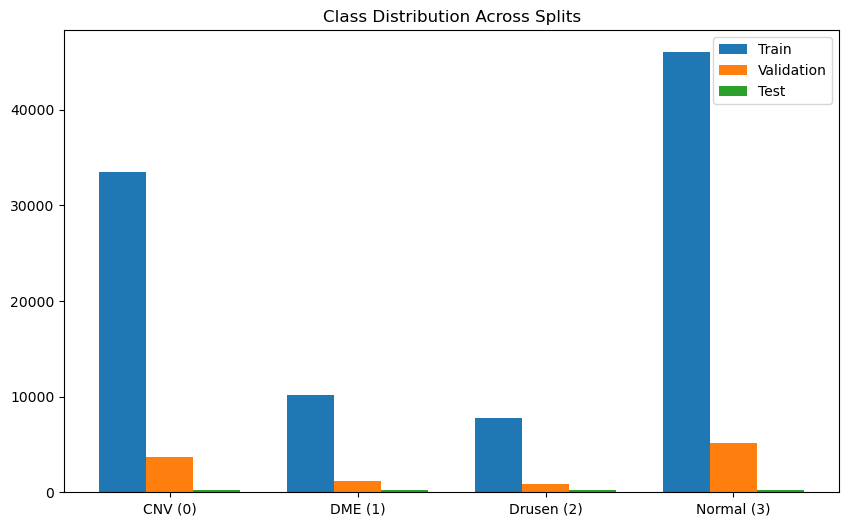

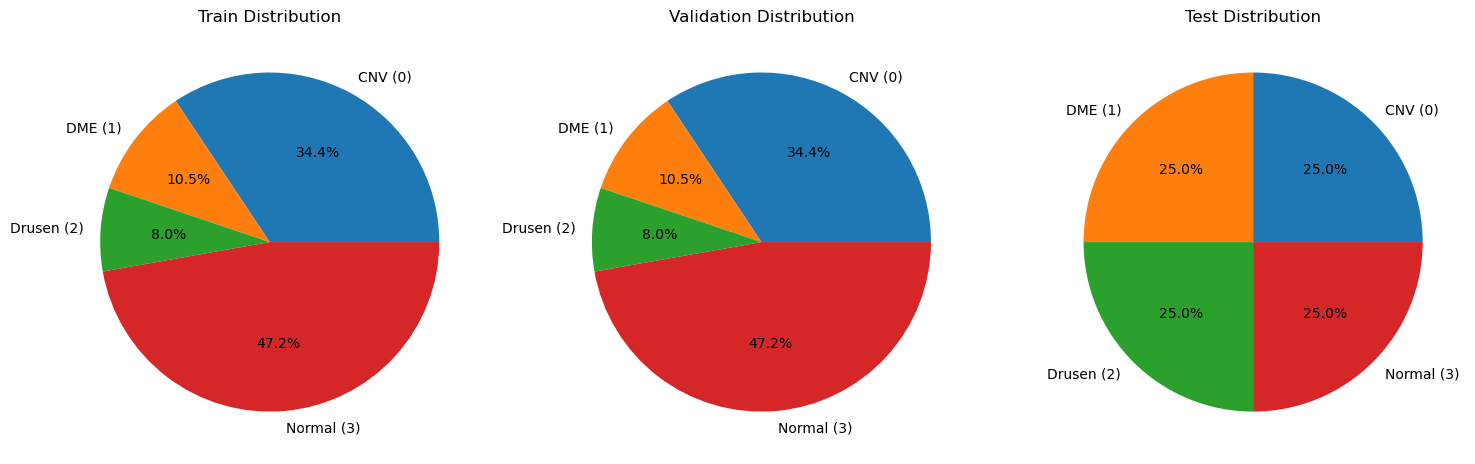

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torchvision.utils import make_grid

# 1. Label Distribution Visualization (Stacked Bar & Pie Charts)
def plot_label_distributions(train_counts, val_counts, test_counts):
    labels = ['CNV (0)', 'DME (1)', 'Drusen (2)', 'Normal (3)']
    splits = ['Train', 'Validation', 'Test']
    
    # Stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.25
    x = np.arange(len(labels))
    
    ax.bar(x - width, [train_counts[i] for i in range(4)], width, label='Train')
    ax.bar(x, [val_counts[i] for i in range(4)], width, label='Validation')
    ax.bar(x + width, [test_counts[i] for i in range(4)], width, label='Test')
    
    ax.set_title('Class Distribution Across Splits')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

    # Pie charts
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for ax, counts, title in zip(axes, [train_counts, val_counts, test_counts], splits):
        ax.pie([counts[i] for i in range(4)], labels=labels, autopct='%1.1f%%')
        ax.set_title(f'{title} Distribution')
    plt.tight_layout()
    plt.show()
# 1. Label distributions
plot_label_distributions(train_counts, val_counts, test_counts)

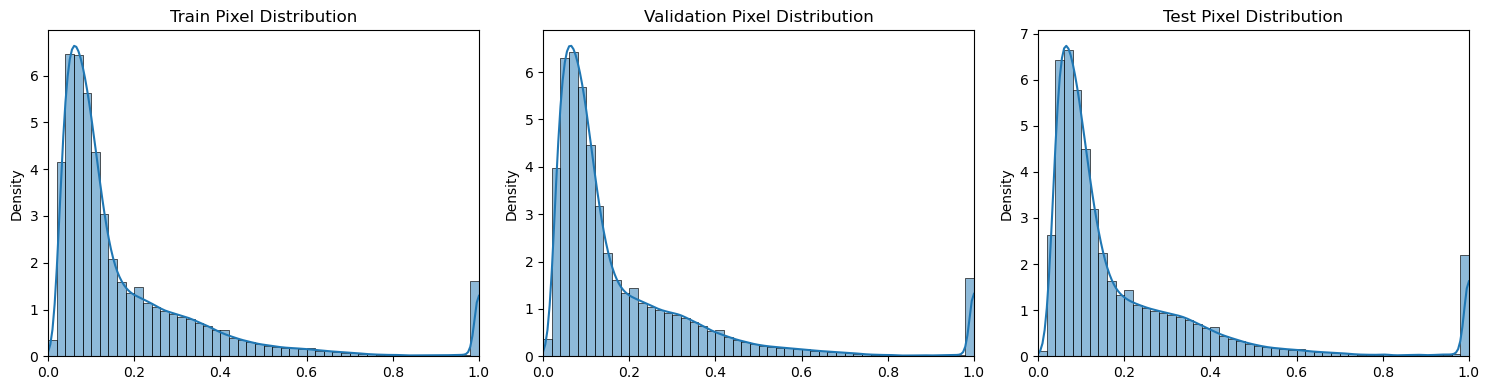

In [163]:
# 2. Pixel Value Distribution Analysis
def plot_pixel_distributions(datasets, num_samples=1000):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for ax, (name, dataset) in zip(axes, datasets.items()):
        # Random sample of images
        indices = np.random.choice(len(dataset), num_samples, replace=False)
        pixels = torch.cat([dataset[i][0].flatten() for i in indices]).numpy()
        
        sns.histplot(pixels, bins=50, kde=True, ax=ax, stat='density')
        ax.set_title(f'{name} Pixel Distribution')
        ax.set_xlim(0, 1)
    
    plt.tight_layout()
    plt.show()
# 2. Pixel distributions
plot_pixel_distributions({
    'Train': train_dataset,
    'Validation': val_dataset,
    'Test': test_dataset
})

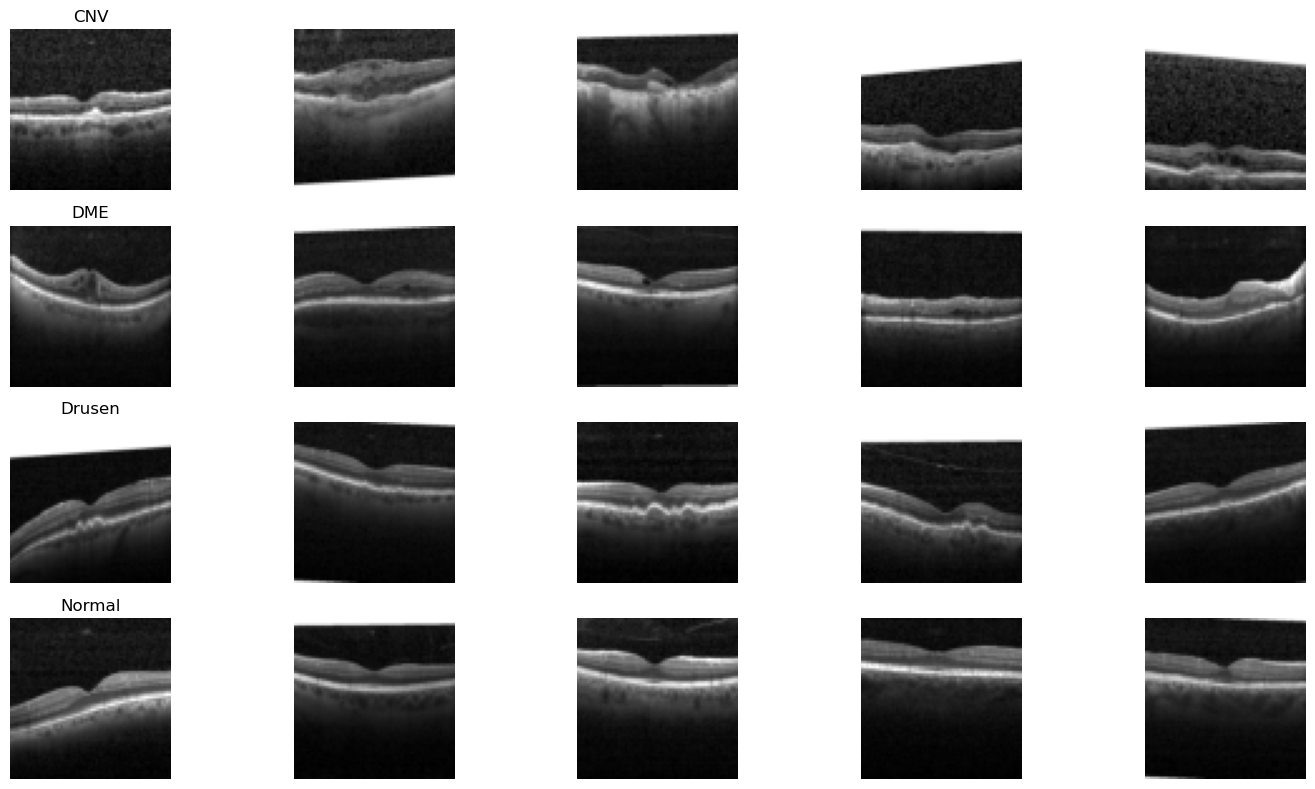

In [164]:
def plot_sample_images(dataset, class_map, n_samples=5):
    fig, axes = plt.subplots(4, n_samples, figsize=(15, 8))
    
    for class_idx in range(4):
        class_indices = [i for i, (_, label) in enumerate(dataset) if label == class_idx]
        selected = np.random.choice(class_indices, n_samples, replace=False)
        
        for j, idx in enumerate(selected):
            ax = axes[class_idx, j]
            img = dataset[idx][0].numpy().squeeze()
            ax.imshow(img, cmap='gray')
            ax.axis('off')
            if j == 0:
                ax.set_title(class_map[class_idx])
    
    plt.tight_layout()
    plt.show()
class_map = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plot_sample_images(train_dataset, class_map)

# Appproach:
- Address the imbalance using techniques such as:
- -- Augmentation: Apply augmentation (e.g., rotation, flipping) to generate more training samples, particularly for DME and Drusen.
  
- -- Evaluation: Carefully monitor per-class accuracy and recall metrics during validation and testing to ensure the model doesn’t ignore minority classes.

# Statistics of data`

In [165]:
# Function to compute dataset statistics
def dataset_statistics(dataset):

    labels = [sample[1].item() for sample in dataset]  # Extract all labels
    images = [(sample[0]).numpy() for sample in dataset]  # Convert images to tensors and numpy arrays

    # Image statistics
    image_shapes = [image.shape for image in images]  # Get shape of each image
    flattened_pixels = [image.flatten() for image in images]  # Flatten images for pixel analysis
    pixel_values = np.concatenate(flattened_pixels)

    # Compute statistics
    stats = {
        "Total Images": len(images),
        "Image Shape": image_shapes[0] if len(image_shapes) > 0 else "N/A",  # Assuming uniform shapes
        "Min Pixel Value": np.min(pixel_values),
        "Max Pixel Value": np.max(pixel_values),
        "Mean Pixel Value": np.mean(pixel_values),
        "Standard Deviation of Pixels": np.std(pixel_values),
        "Number of Unique Labels": len(set(labels)),
        "Label Counts": Counter(labels)
    }

    return stats

# Analyze train, validation, and test sets
train_stats = dataset_statistics(train_dataset)
val_stats = dataset_statistics(val_dataset)
test_stats = dataset_statistics(test_dataset)

# Prepare data for display
overall_stats = {
    "Statistic": ["Total Images", "Image Shape", "Min Pixel Value", "Max Pixel Value",
                  "Mean Pixel Value", "Std Dev of Pixels", "Unique Labels", "Label Counts"],
    "Training Set": [train_stats["Total Images"], train_stats["Image Shape"], train_stats["Min Pixel Value"],
                     train_stats["Max Pixel Value"], train_stats["Mean Pixel Value"],
                     train_stats["Standard Deviation of Pixels"], train_stats["Number of Unique Labels"],
                     dict(train_stats["Label Counts"])],
    "Validation Set": [val_stats["Total Images"], val_stats["Image Shape"], val_stats["Min Pixel Value"],
                       val_stats["Max Pixel Value"], val_stats["Mean Pixel Value"],
                       val_stats["Standard Deviation of Pixels"], val_stats["Number of Unique Labels"],
                       dict(val_stats["Label Counts"])],
    "Test Set": [test_stats["Total Images"], test_stats["Image Shape"], test_stats["Min Pixel Value"],
                 test_stats["Max Pixel Value"], test_stats["Mean Pixel Value"],
                 test_stats["Standard Deviation of Pixels"], test_stats["Number of Unique Labels"],
                 dict(test_stats["Label Counts"])]
}

# Display results
df_overall_stats = pd.DataFrame(overall_stats)
display(df_overall_stats)


,Statistic,Training Set,Validation Set,Test Set
0,Total Images,97477,10832,1000
1,Image Shape,"(1, 64, 64)","(1, 64, 64)","(1, 64, 64)"
2,Min Pixel Value,0.0,0.0,0.0
3,Max Pixel Value,1.0,1.0,1.0
4,Mean Pixel Value,0.189433,0.188934,0.203716
5,Std Dev of Pixels,0.207148,0.206629,0.223393
6,Unique Labels,4,4,4
7,Label Counts,"{0: 33484, 3: 46026, 1: 10213, 2: 7754}","{3: 5114, 0: 3721, 1: 1135, 2: 862}","{3: 250, 2: 250, 0: 250, 1: 250}"


# Image Info Deep Dive:

In [166]:
# Function to get image sizes and their counts
def get_image_size_counts(dataset):
    # Extract image shapes (convert PIL to tensor for safety)
    image_sizes = [(sample[0]).shape for sample in dataset]
    return pd.Series(image_sizes).value_counts()

# Get image size counts for the train set
train_image_sizes = get_image_size_counts(train_dataset)
val_image_sizes = get_image_size_counts(val_dataset)
test_image_sizes = get_image_size_counts(test_dataset)

# Display the counts
print(train_image_sizes)
print(val_image_sizes)
print(test_image_sizes)


(1, 64, 64)    97477
Name: count, dtype: int64
(1, 64, 64)    10832
Name: count, dtype: int64
(1, 64, 64)    1000
Name: count, dtype: int64


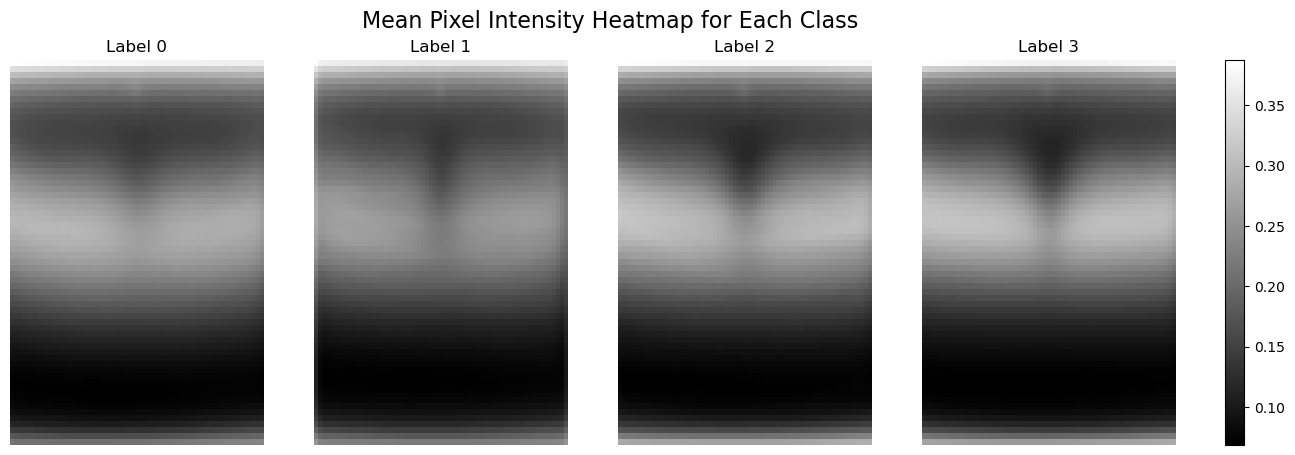

In [167]:
def plot_mean_pixel_heatmap(dataset):
    fig, axes = plt.subplots(1, 4, figsize=(16, 5))
    fig.suptitle("Mean Pixel Intensity Heatmap for Each Class", fontsize=16)

    for label in range(4):
        # Collect all images for the given label
        images = [(sample[0]).numpy().squeeze() for sample in dataset if sample[1].item() == label]
        # Compute the mean image
        mean_image = np.mean(images, axis=0)

        # Plot the heatmap
        ax = axes[label]
        cax = ax.imshow(mean_image, cmap='gray', aspect='auto')
        ax.set_title(f"Label {label}")
        ax.axis('off')

    # Add colorbar to the side
    fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    plt.show()

# Apply to the training dataset
plot_mean_pixel_heatmap(train_dataset)


# General Structure:

Each heatmap represents the average pixel intensity of images from a specific label, showing common patterns.
Brighter regions indicate higher pixel intensity, which could correspond to denser or abnormal structures, while darker regions represent less dense areas or background.
Class-wise Analysis:

Label 0 (CNV - Choroidal Neovascularization):

More variation in the upper-middle region, suggesting abnormal blood vessel growth near this area.
Label 1 (DME - Diabetic Macular Edema):

Central bright region indicates fluid accumulation in the macula, which is a characteristic of DME.
Label 2 (Drusen):

Slightly more uniform but shows bright spots that could correspond to lipid deposits under the retina.
Label 3 (Normal Retina):

The heatmap appears smoother and more uniform, with no distinct bright spots or irregularities, representing a healthy retina.

Training set needs shuffling to avoid bias during training, as the model may overfit to one class at a time.
Validation set has partial shuffling, but further improvement may help ensure better evaluation during training.

In [168]:
def extract_data_and_labels(dataset):
    # Extract images and labels from dataset
    images = [torch.flatten((sample[0])) for sample in dataset]  # Flatten images to 1D arrays
    labels = [sample[1].item() for sample in dataset]  # Extract labels

    # Stack the list of tensors into one tensor
    X = torch.stack(images)
    y = torch.tensor(labels)

    return X, y

# Extract X and y for train, validation, and test sets
X_train, y_train = extract_data_and_labels(train_dataset)
X_val, y_val = extract_data_and_labels(val_dataset)
X_test, y_test = extract_data_and_labels(test_dataset)

# Display the shapes of the resulting tensors
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: torch.Size([97477, 4096]), y_train shape: torch.Size([97477])
X_val shape: torch.Size([10832, 4096]), y_val shape: torch.Size([10832])
X_test shape: torch.Size([1000, 4096]), y_test shape: torch.Size([1000])


## Modelling

In [169]:
import torch
from sklearn.utils.class_weight import compute_class_weight

# y_train is a PyTorch tensor
classes = torch.unique(y_train).numpy()  # Convert unique classes to NumPy for compute_class_weight
class_weights = compute_class_weight('balanced', classes=classes, y=y_train.numpy())  # y_train as NumPy

# Store weights in a dictionary if needed
class_weight_dict = {i: class_weights[i] for i in range(len(classes))}
print("Class weights: ", class_weight_dict)

# Convert class weights to a tensor and move them to the correct device
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)



Class weights:  {0: 0.7277878986978855, 1: 2.386101047684324, 2: 3.142797265927263, 3: 0.5294670403684874}


Class 0 is weighted with 0.7278 (less penalty, implying more samples).
Class 1 is weighted with 2.3861 (higher penalty due to fewer samples).
Class 2 is weighted with 3.1428 (even higher penalty due to being a very minority class).
 3 is weighted with 0.5295 (least penalty, implying it is a majority class).

In [192]:
import torch.nn as nn
import torch.nn.functional as F

class OctMNISTModel(nn.Module):
    def __init__(self, num_classes=4):
        super(OctMNISTModel, self).__init__()
        
        # Convolutional layers with Batch Normalization
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout_conv1 = nn.Dropout(p=0.3)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout_conv2 = nn.Dropout(p=0.3)
        
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 13 * 13, 128)  # Adjusted after calculation
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))  # First convolution and pooling
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))  # Second convolution and pooling
        x = x.view(x.size(0), -1)  # Flattening
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [193]:
model = OctMNISTModel(num_classes=len(classes)).to(device)

In [194]:
# Instantiate the model and move to device
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import torch
from torch import nn, optim
from torch.utils.data import Subset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

num_epochs = 100
accum_steps = 4  # Gradient accumulation steps
clip_grad_norm = 1.0  # Gradient clipping norm
patience = 10  # Early stopping patience

# Model and optimizer
model = OctMNISTModel(num_classes=4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
# Early Stopping Variables
best_val_loss = float('inf')
epochs_no_improve = 0


In [195]:
# Metric Storage for Visualization
train_acc_history, val_acc_history = [], []
train_loss_history, val_loss_history = [], []

# Training Loop with Gradient Accumulation and Early Stopping
total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()
    model.train()
    running_loss, correct_train_preds, total_train_samples = 0.0, 0, 0

    optimizer.zero_grad()

    # Training Phase with Gradient Accumulation
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.float().to(device), labels.to(device)

        # Ensure labels are 1D (squeeze any extra dimensions)
        labels = labels.squeeze()
    
        # Forward pass
        outputs = model(data)
    
        # Ensure outputs and labels are compatible
        assert outputs.shape[0] == labels.shape[0], "Batch size mismatch between outputs and labels"
        assert len(labels.shape) == 1, "Labels must be a 1D tensor"
    
        # Compute loss
        loss = loss_fn(outputs, labels)
        running_loss += loss.item() * data.size(0)
    
        # Normalize loss for accumulation
        loss /= accum_steps
        loss.backward()
    
        # Gradient accumulation step
        if (batch_idx + 1) % accum_steps == 0 or (batch_idx + 1) == len(train_loader):
            if clip_grad_norm:
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad_norm)
            optimizer.step()
            optimizer.zero_grad()

        # Track training accuracy
        _, preds = torch.max(outputs, dim=1)
        correct_train_preds += (preds == labels).sum().item()
        total_train_samples += labels.size(0)

    train_acc_history.append(correct_train_preds / total_train_samples)
    train_loss_history.append(running_loss / len(train_loader.dataset))

    # Validation Phase
    model.eval()
    val_loss, correct_val_preds, total_val_samples = 0.0, 0, 0
    
    with torch.no_grad():
        for val_data, val_labels in val_loader:
            # Move data and labels to device
            val_data, val_labels = val_data.float().to(device), val_labels.to(device)
    
            # Ensure labels are 1D (squeeze any extra dimensions)
            val_labels = val_labels.squeeze()
    
            # Forward pass
            val_outputs = model(val_data)
    
            # Ensure outputs and labels are compatible
            assert val_outputs.shape[0] == val_labels.shape[0], "Batch size mismatch between outputs and labels"
            assert len(val_labels.shape) == 1, "Labels must be a 1D tensor"
    
            # Compute loss
            val_loss += loss_fn(val_outputs, val_labels).item() * val_data.size(0)
    
            # Calculate validation accuracy
            _, val_preds = torch.max(val_outputs, dim=1)
            correct_val_preds += (val_preds == val_labels).sum().item()
            total_val_samples += val_labels.size(0)
    
    avg_val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct_val_preds / total_val_samples
    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc_history.append(correct_val_preds / total_val_samples)
    val_loss_history.append(avg_val_loss)

    # Learning Rate Scheduler Step
    scheduler.step(avg_val_loss)

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_model.pth")
        print(f"Epoch {epoch+1}: Best model saved!")
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print("Early stopping triggered!")
        break

    epoch_time = time.time() - epoch_start

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss_history[-1]:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, "
          f"Train Acc: {train_acc_history[-1]:.4f}, "
          f"Val Acc: {val_acc_history[-1]:.4f}, "
          f"Time: {epoch_time:.2f}s")

total_time = time.time() - total_start
print(f"\nTotal training time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)")


Epoch 1: Best model saved!
Epoch [1/100] - Train Loss: 1.2225, Val Loss: 1.1382, Train Acc: 0.4753, Val Acc: 0.6413, Time: 67.96s
Epoch 2: Best model saved!
Epoch [2/100] - Train Loss: 1.0811, Val Loss: 0.7551, Train Acc: 0.5082, Val Acc: 0.8263, Time: 70.60s
Epoch 3: Best model saved!
Epoch [3/100] - Train Loss: 0.8677, Val Loss: 0.6162, Train Acc: 0.6579, Val Acc: 0.8534, Time: 69.69s
Epoch 4: Best model saved!
Epoch [4/100] - Train Loss: 0.7121, Val Loss: 0.5192, Train Acc: 0.7283, Val Acc: 0.8507, Time: 67.27s
Epoch 5: Best model saved!
Epoch [5/100] - Train Loss: 0.6196, Val Loss: 0.4964, Train Acc: 0.7738, Val Acc: 0.8371, Time: 68.94s
Epoch 6: Best model saved!
Epoch [6/100] - Train Loss: 0.5595, Val Loss: 0.4273, Train Acc: 0.7971, Val Acc: 0.8448, Time: 67.22s
Epoch [7/100] - Train Loss: 0.5203, Val Loss: 0.4524, Train Acc: 0.8120, Val Acc: 0.8388, Time: 67.10s
Epoch 8: Best model saved!
Epoch [8/100] - Train Loss: 0.4885, Val Loss: 0.4143, Train Acc: 0.8302, Val Acc: 0.8944, 

In [174]:
from sklearn.metrics import classification_report
import torch

def evaluate_model(model, loader, device):
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()  # Set to evaluation mode

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)  # Get predicted class
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Print the classification report
    print(classification_report(all_labels, all_preds))


In [175]:
print("TRAIN CONFUSION MATRIX")
evaluate_model(model, train_loader, device)
print("=" * 60)
print("VALIDATION CONFUSION MATRIX")
evaluate_model(model, val_loader, device)
print("=" * 60)
print("\nTEST CONFUSION MATRIX")
evaluate_model(model, test_loader, device)

TRAIN CONFUSION MATRIX
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     33484
           1       0.94      0.99      0.97     10213
           2       0.80      0.98      0.88      7754
           3       0.99      0.98      0.98     46026

    accuracy                           0.97     97477
   macro avg       0.93      0.97      0.95     97477
weighted avg       0.97      0.97      0.97     97477

VALIDATION CONFUSION MATRIX
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3721
           1       0.89      0.94      0.92      1135
           2       0.69      0.88      0.78       862
           3       0.98      0.96      0.97      5114

    accuracy                           0.94     10832
   macro avg       0.89      0.93      0.90     10832
weighted avg       0.95      0.94      0.94     10832


TEST CONFUSION MATRIX
              precision    recall  f1-score   support

 

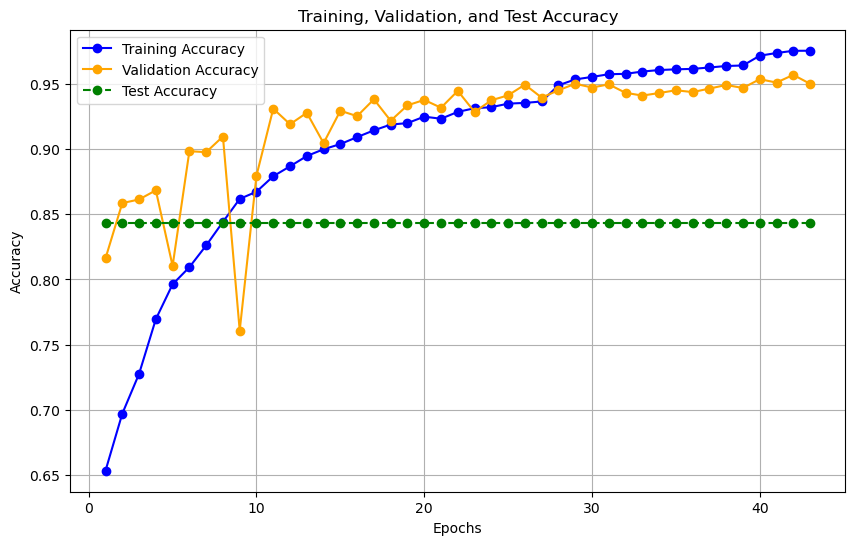

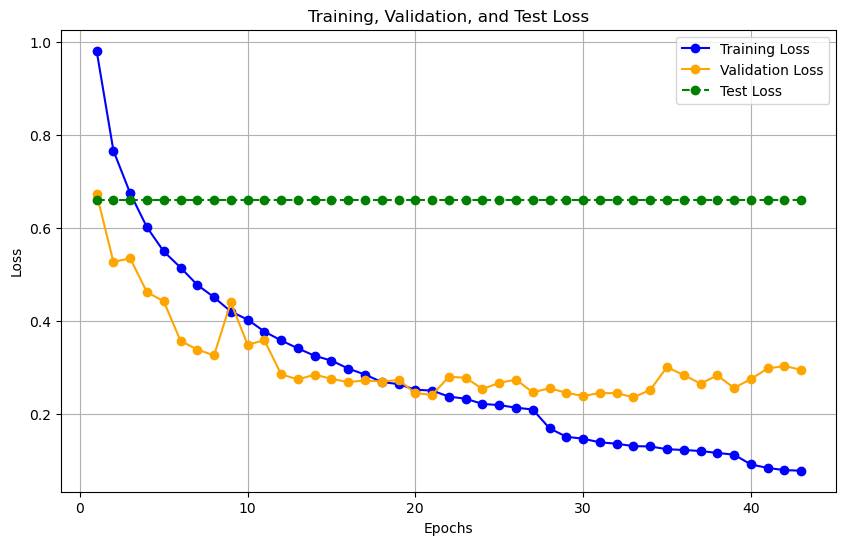

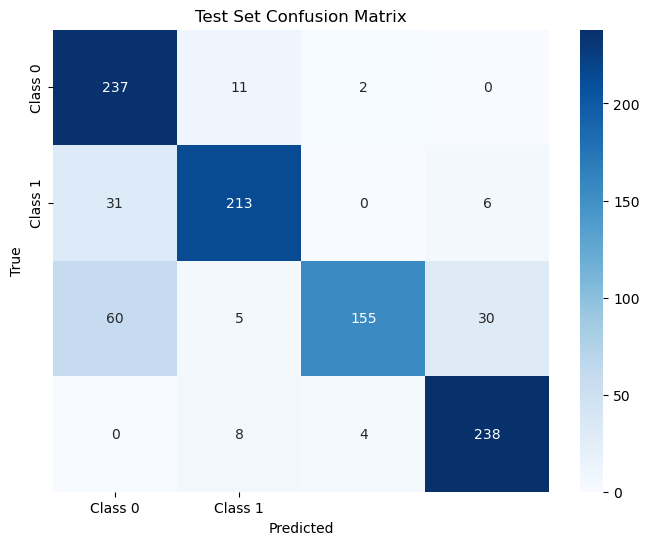

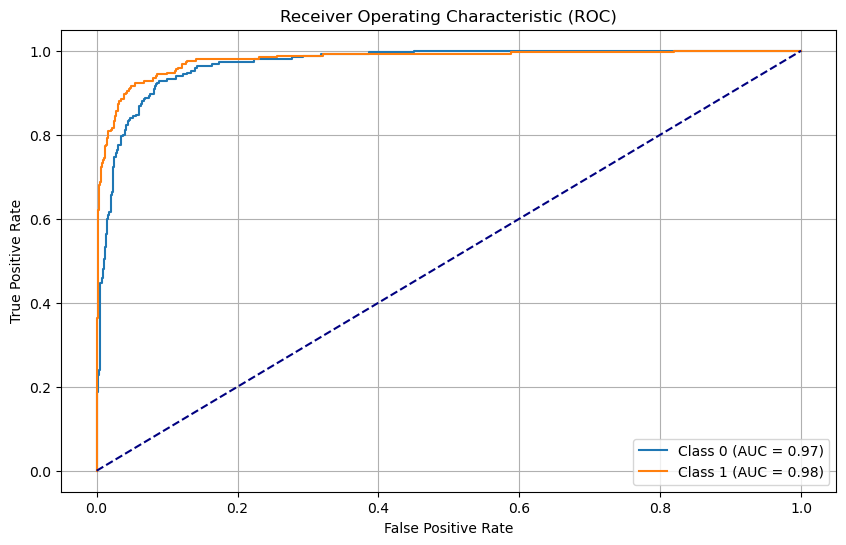

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import torch.nn.functional as F

# Assuming you have the following data from training and evaluation:
# train_acc_history, val_acc_history, train_loss_history, val_loss_history
# test_acc (single value), test_loss (single value)
# test_labels, test_preds, test_probs (from evaluation on the test set)

# 1. Plot Training, Validation, and Test Accuracy
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_acc_history) + 1)
plt.plot(epochs, train_acc_history, 'b-', label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc_history, 'orange', label='Validation Accuracy', marker='o')
plt.plot(epochs, [test_acc] * len(epochs), 'g--', label='Test Accuracy', marker='o')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Training, Validation, and Test Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss_history, 'b-', label='Training Loss', marker='o')
plt.plot(epochs, val_loss_history, 'orange', label='Validation Loss', marker='o')
plt.plot(epochs, [test_loss] * len(epochs), 'g--', label='Test Loss', marker='o')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 3. Confusion Matrix on Test Data
conf_mat = confusion_matrix(test_labels, test_preds)
classes = ['Class 0', 'Class 1']  # Replace with your actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. ROC Curve (Receiver Operating Characteristic)
# Assuming `test_probs` is a matrix of probabilities for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(np.array(test_labels) == i,
                                  np.array(test_probs)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    
# Add diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Trying Focal Loss

In [184]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

# Define Weighted Focal Loss
class WeightedFocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2, reduction='mean'):
        super(WeightedFocalLoss, self).__init__()
        self.alpha = alpha  # Class weights (tensor of size [num_classes])
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)  # Probabilities of correct classes
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

In [185]:
# Instantiate the model and move to device
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import torch
from torch import nn, optim
from torch.utils.data import Subset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

num_epochs = 100
accum_steps = 4  # Gradient accumulation steps
clip_grad_norm = 1.0  # Gradient clipping norm
patience = 10  # Early stopping patience

# Model and optimizer
model = OctMNISTModel(num_classes=4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

loss_fn = WeightedFocalLoss(alpha=class_weights_tensor, gamma=2).to(device)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
# Early Stopping Variables
best_val_loss = float('inf')
epochs_no_improve = 0



In [186]:
# Metric Storage for Visualization
train_acc_history, val_acc_history = [], []
train_loss_history, val_loss_history = [], []

# Training Loop with Gradient Accumulation and Early Stopping
total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()
    model.train()
    running_loss, correct_train_preds, total_train_samples = 0.0, 0, 0

    optimizer.zero_grad()

    # Training Phase with Gradient Accumulation
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.float().to(device), labels.to(device)

        # Ensure labels are 1D (squeeze any extra dimensions)
        labels = labels.squeeze()
    
        # Forward pass
        outputs = model(data)
    
        # Ensure outputs and labels are compatible
        assert outputs.shape[0] == labels.shape[0], "Batch size mismatch between outputs and labels"
        assert len(labels.shape) == 1, "Labels must be a 1D tensor"
    
        # Compute loss
        loss = loss_fn(outputs, labels)
        running_loss += loss.item() * data.size(0)
    
        # Normalize loss for accumulation
        loss /= accum_steps
        loss.backward()
    
        # Gradient accumulation step
        if (batch_idx + 1) % accum_steps == 0 or (batch_idx + 1) == len(train_loader):
            if clip_grad_norm:
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad_norm)
            optimizer.step()
            optimizer.zero_grad()

        # Track training accuracy
        _, preds = torch.max(outputs, dim=1)
        correct_train_preds += (preds == labels).sum().item()
        total_train_samples += labels.size(0)

    train_acc_history.append(correct_train_preds / total_train_samples)
    train_loss_history.append(running_loss / len(train_loader.dataset))

    # Validation Phase
    model.eval()
    val_loss, correct_val_preds, total_val_samples = 0.0, 0, 0
    
    with torch.no_grad():
        for val_data, val_labels in val_loader:
            # Move data and labels to device
            val_data, val_labels = val_data.float().to(device), val_labels.to(device)
    
            # Ensure labels are 1D (squeeze any extra dimensions)
            val_labels = val_labels.squeeze()
    
            # Forward pass
            val_outputs = model(val_data)
    
            # Ensure outputs and labels are compatible
            assert val_outputs.shape[0] == val_labels.shape[0], "Batch size mismatch between outputs and labels"
            assert len(val_labels.shape) == 1, "Labels must be a 1D tensor"
    
            # Compute loss
            val_loss += loss_fn(val_outputs, val_labels).item() * val_data.size(0)
    
            # Calculate validation accuracy
            _, val_preds = torch.max(val_outputs, dim=1)
            correct_val_preds += (val_preds == val_labels).sum().item()
            total_val_samples += val_labels.size(0)
    
    avg_val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct_val_preds / total_val_samples
    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc_history.append(correct_val_preds / total_val_samples)
    val_loss_history.append(avg_val_loss)

    # Learning Rate Scheduler Step
    scheduler.step(avg_val_loss)

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_model.pth")
        print(f"Epoch {epoch+1}: Best model saved!")
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print("Early stopping triggered!")
        break

    epoch_time = time.time() - epoch_start

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss_history[-1]:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, "
          f"Train Acc: {train_acc_history[-1]:.4f}, "
          f"Val Acc: {val_acc_history[-1]:.4f}, "
          f"Time: {epoch_time:.2f}s")

total_time = time.time() - total_start
print(f"\nTotal training time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)")


Epoch 1: Best model saved!
Epoch [1/100] - Train Loss: 0.6356, Val Loss: 0.4646, Train Acc: 0.2723, Val Acc: 0.5414, Time: 71.93s
Epoch 2: Best model saved!
Epoch [2/100] - Train Loss: 0.4617, Val Loss: 0.3175, Train Acc: 0.4309, Val Acc: 0.6469, Time: 73.09s
Epoch 3: Best model saved!
Epoch [3/100] - Train Loss: 0.3676, Val Loss: 0.2331, Train Acc: 0.5194, Val Acc: 0.6460, Time: 72.31s
Epoch 4: Best model saved!
Epoch [4/100] - Train Loss: 0.3194, Val Loss: 0.2029, Train Acc: 0.5906, Val Acc: 0.6708, Time: 71.35s
Epoch [5/100] - Train Loss: 0.2920, Val Loss: 0.2901, Train Acc: 0.6151, Val Acc: 0.7130, Time: 74.75s
Epoch 6: Best model saved!
Epoch [6/100] - Train Loss: 0.2707, Val Loss: 0.1774, Train Acc: 0.6339, Val Acc: 0.7160, Time: 74.57s
Epoch [7/100] - Train Loss: 0.2467, Val Loss: 0.1928, Train Acc: 0.6623, Val Acc: 0.8741, Time: 75.24s
Epoch 8: Best model saved!
Epoch [8/100] - Train Loss: 0.2392, Val Loss: 0.1526, Train Acc: 0.6706, Val Acc: 0.7666, Time: 75.01s
Epoch [9/100] 

In [187]:
from sklearn.metrics import classification_report
import torch

def evaluate_model(model, loader, device):
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()  # Set to evaluation mode

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)  # Get predicted class
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Print the classification report
    print(classification_report(all_labels, all_preds))


In [188]:
print("TRAIN CONFUSION MATRIX")
evaluate_model(model, train_loader, device)
print("=" * 60)
print("VALIDATION CONFUSION MATRIX")
evaluate_model(model, val_loader, device)
print("=" * 60)
print("\nTEST CONFUSION MATRIX")
evaluate_model(model, test_loader, device)

TRAIN CONFUSION MATRIX
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     33484
           1       0.78      0.99      0.87     10213
           2       0.55      0.97      0.70      7754
           3       0.99      0.86      0.92     46026

    accuracy                           0.90     97477
   macro avg       0.83      0.93      0.86     97477
weighted avg       0.94      0.90      0.91     97477

VALIDATION CONFUSION MATRIX
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3721
           1       0.75      0.96      0.84      1135
           2       0.50      0.91      0.64       862
           3       0.98      0.84      0.91      5114

    accuracy                           0.88     10832
   macro avg       0.80      0.90      0.83     10832
weighted avg       0.92      0.88      0.89     10832


TEST CONFUSION MATRIX
              precision    recall  f1-score   support

 

Focal Loss didnt perform as well

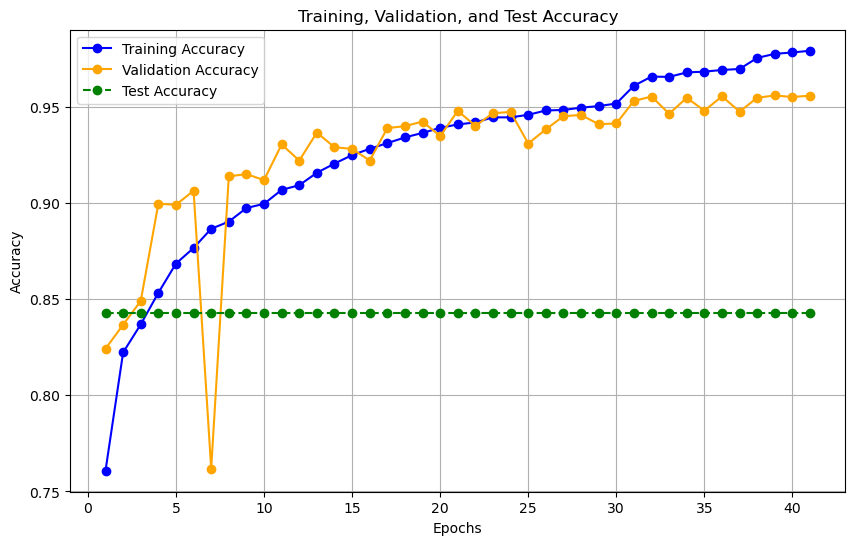

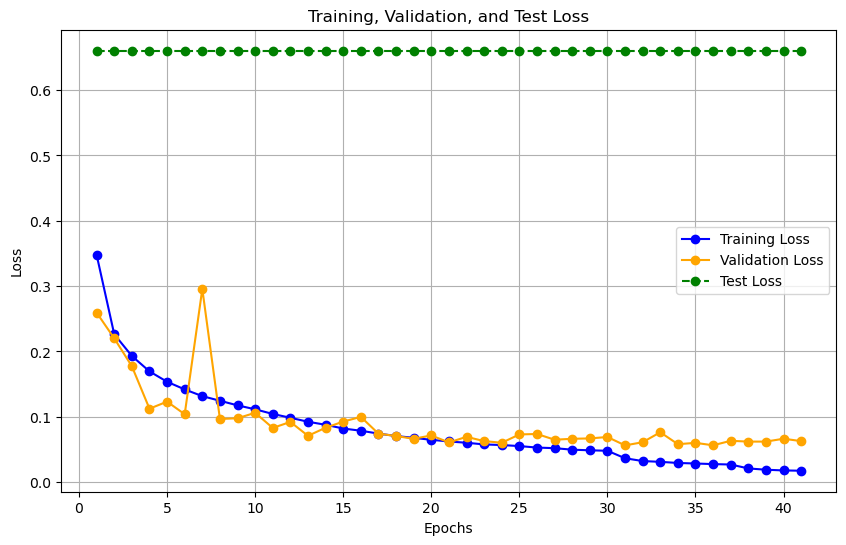

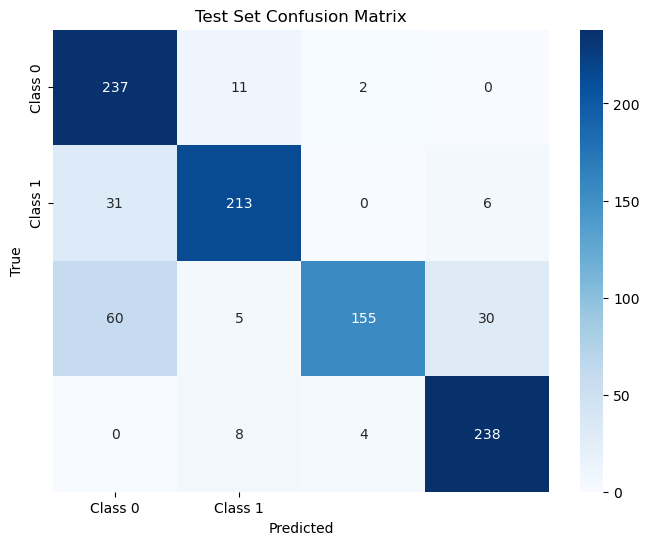

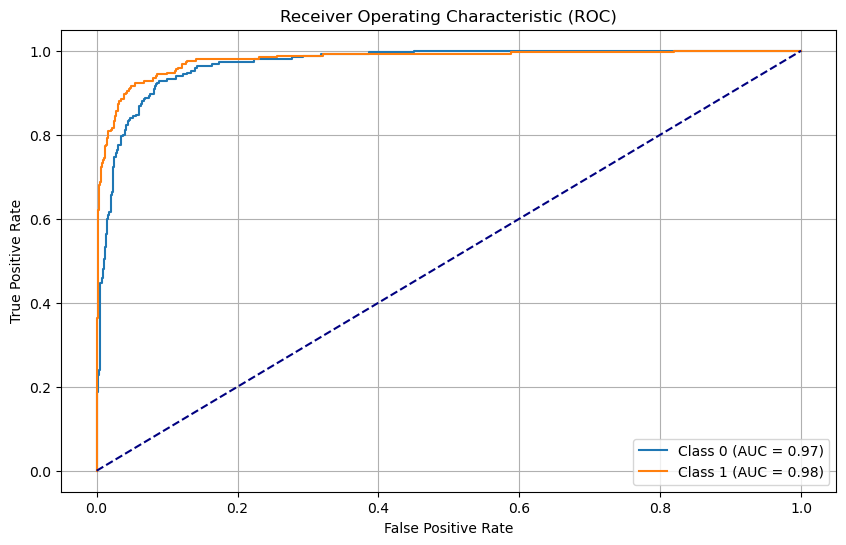

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import torch.nn.functional as F

# Assuming you have the following data from training and evaluation:
# train_acc_history, val_acc_history, train_loss_history, val_loss_history
# test_acc (single value), test_loss (single value)
# test_labels, test_preds, test_probs (from evaluation on the test set)

# 1. Plot Training, Validation, and Test Accuracy
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_acc_history) + 1)
plt.plot(epochs, train_acc_history, 'b-', label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc_history, 'orange', label='Validation Accuracy', marker='o')
plt.plot(epochs, [test_acc] * len(epochs), 'g--', label='Test Accuracy', marker='o')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Training, Validation, and Test Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss_history, 'b-', label='Training Loss', marker='o')
plt.plot(epochs, val_loss_history, 'orange', label='Validation Loss', marker='o')
plt.plot(epochs, [test_loss] * len(epochs), 'g--', label='Test Loss', marker='o')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 3. Confusion Matrix on Test Data
conf_mat = confusion_matrix(test_labels, test_preds)
classes = ['Class 0', 'Class 1']  # Replace with your actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. ROC Curve (Receiver Operating Characteristic)
# Assuming `test_probs` is a matrix of probabilities for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(np.array(test_labels) == i,
                                  np.array(test_probs)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    
# Add diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [196]:
import torch
from collections import OrderedDict

# Load the .pth file
file_path = 'best_model.pth'  # Replace with your .pth file path
loaded_data = torch.load(file_path)

# Check if the file contains a state dictionary or additional data
if 'state_dict' in loaded_data:  # If it's a checkpoint with 'state_dict'
    state_dict = loaded_data['state_dict']
else:  # If it's directly a state dictionary
    state_dict = loaded_data

# Remove 'module.' prefix if present (e.g., when using DataParallel)
new_state_dict = OrderedDict()
for key, value in state_dict.items():
    new_key = key.replace("module.", "")  # Remove 'module.' prefix
    new_state_dict[new_key] = value

state_dict = new_state_dict

# Inspect the keys in the state dictionary
print("Keys in the state dictionary:")
for key in state_dict.keys():
    print(key)

# Print weights for a specific layer (replace with an actual key from the output above)
specific_layer_key = list(state_dict.keys())[0]  # Example: First key in the dictionary
print(f"\nWeights for layer '{specific_layer_key}':")
print(state_dict[specific_layer_key])

# Print all weights (optional - can produce a lot of output for large models)
print("\nAll weights:")
for key, value in state_dict.items():
    if 'weight' in key:  # Filter only weight parameters
        print(f"{key}:\n{value}\n")


Keys in the state dictionary:
conv1.weight
conv1.bias
bn1.weight
bn1.bias
bn1.running_mean
bn1.running_var
bn1.num_batches_tracked
conv2.weight
conv2.bias
bn2.weight
bn2.bias
bn2.running_mean
bn2.running_var
bn2.num_batches_tracked
fc1.weight
fc1.bias
fc2.weight
fc2.bias

Weights for layer 'conv1.weight':
tensor([[[[ 0.0268,  0.0037, -0.1351,  0.0327, -0.0363],
          [-0.0436, -0.0205,  0.1260,  0.1391, -0.0442],
          [ 0.1218,  0.0005, -0.0023, -0.0213, -0.1160],
          [ 0.1076,  0.1272, -0.1020, -0.3252, -0.5019],
          [-0.0535, -0.1036,  0.0319,  0.1753,  0.2499]]],


        [[[ 0.0769, -0.1050, -0.1246,  0.0138, -0.1261],
          [-0.0405, -0.1253,  0.0584,  0.1960,  0.0630],
          [ 0.2567, -0.0205, -0.1270, -0.1163, -0.2194],
          [ 0.4518, -0.1502, -0.1436,  0.0343, -0.2583],
          [ 0.3384, -0.1024, -0.1684,  0.1736, -0.0649]]],


        [[[ 0.0249,  0.0316,  0.0113,  0.0646, -0.1217],
          [-0.0125,  0.0010, -0.0258, -0.0533, -0.1338],
 